# Minimum of 3 dices

Suppose you roll three fair 100-sided die. What is the expected value of the lowest roll?

Source: https://openquant.co/questions/3-die-minimum

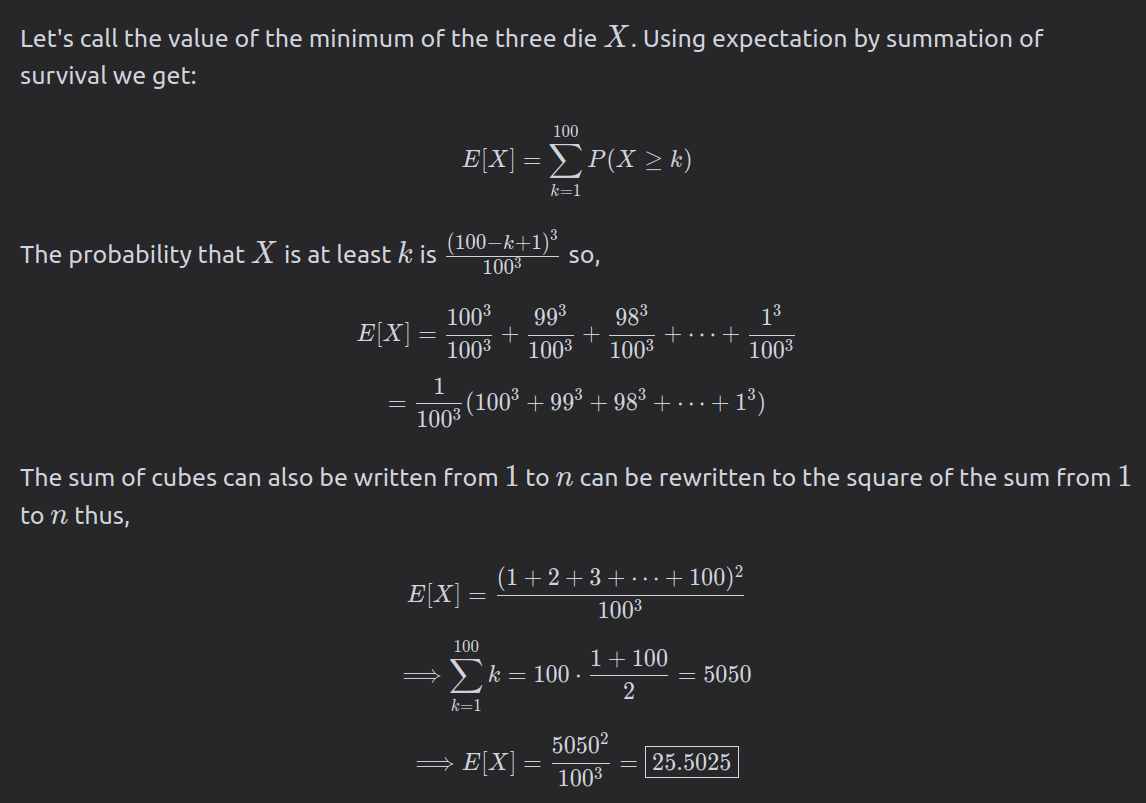

In [1]:
import numpy as np
import random

In [2]:
num_faces = 100
num_trials = int(1e6)
num_dice = 3

In [3]:
samples = np.random.randint(1, high=num_faces,
                            size=(num_dice, num_trials), dtype=int)
min_bag = np.min(samples, axis=0)

print(np.mean(min_bag))

25.245031


In [4]:
# Solution on website

#roll_dice = lambda: random.randint(1, 100) # gives expected answer
roll_dice = lambda: np.random.randint(1, 100) # doesn't. lol.

mins = []
for i in range(num_trials):
    d1 = roll_dice()
    d2 = roll_dice()
    d3 = roll_dice()

    mins.append(min(d1, d2, d3))

print(sum(mins) / num_trials)

25.253906


So `np.random.randint` is dodgey?

Anyway, the fact that the expectation of a non-negative random variable can be computed via the Survival function instead is called the 'Darth Vader Rule' (see Tatra Mt. Math. Publ. 52 (2012), 53–63), although it was first written in An Introduction to Probability Theory and its Applications. Vol. 2. John
Wiley & Sons, Inc. New York, 1966. Actuarists supposedly use it often, but I have not encountered it before in Particle Physics.

\begin{align}
E[X] &= \sum_{x=0}^\infty x P(X=x)\\
&= 0 P(X=0) + &1 P(X=1) + 2 P(X=2) + 3 P(X=3) +\cdots\\
&= &1 P(X=1) + 2 P(X=2) + 3 P(X=3) +\cdots\\
&= &1 P(X=1) + &P(X=2) + &P(X=3) +\cdots\\
&  & + &P(X=2) + &P(X=3) +\cdots\\
&  & & &P(X=3) +\cdots\\
&= \sum_{x=1}^\infty P(X\geq x)\\
\end{align}
